In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive/')

In [0]:
import sys

dataroot = "/content/drive/My Drive/Data/background_subtraction/opencv/"
sys.path.append(dataroot)

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os, fnmatch
import glob
%matplotlib inline

In [0]:
def createMask(bImgname, bFImgname,mskImgname):
  #print('.......reading image')
  bImg = cv2.imread(bImgname, cv2.IMREAD_GRAYSCALE)
  bFImg = cv2.imread(bFImgname, cv2.IMREAD_GRAYSCALE)
  mskImg = cv2.imread(mskImgname, cv2.IMREAD_GRAYSCALE)
  # print(bImg.shape)
  # change the images to RGB
  # bImg = cv2.cvtColor(bImg, cv2.COLOR_BGR2RGB)
  # bImg = cv2.cvtColor(bImg, cv2.COLOR_BGR2GRAY)
  fig = plt.figure()
  plt.subplot(1,4,1)
  # plt.title(bImgname)
  plt.imshow(bImg)
  plt.subplot(1,4,2)
  # plt.title(bFImgname)
  plt.imshow(bFImg)
  plt.subplot(1,4,3)
  # plt.title(mskImgname)
  plt.imshow(mskImg)
  fig.show()
  # Apply Laplacian to both
  laplacianB = cv2.Laplacian(bImg, cv2.CV_32F, ksize = 3, scale = 1, delta = 0)
  laplacianBB = cv2.Laplacian(bFImg, cv2.CV_32F, ksize = 3, scale = 1, delta = 0)
  #print('.......laplacian completed saving')

  # Normalize results
  cv2.normalize(laplacianB, 
                  dst = laplacianB, 
                  alpha = 0, 
                  beta = 1, 
                  norm_type = cv2.NORM_MINMAX, 
                  dtype = cv2.CV_32F)

  cv2.normalize(laplacianBB, 
                  dst = laplacianBB, 
                  alpha = 0, 
                  beta = 1, 
                  norm_type = cv2.NORM_MINMAX, 
                  dtype = cv2.CV_32F)
  
  # Take difference of derivatives
  diffImg = laplacianBB - laplacianB

  # Normalize - may be positives and negatives so
  cv2.normalize(diffImg, 
                dst = diffImg, 
                alpha = 0, 
                beta = 1, 
                norm_type = cv2.NORM_MINMAX, 
                dtype = cv2.CV_32F)
  
  # Apply BINARY THRESHOLDING
  # Using 0.1 higher than mean values ( i.e. 10% higher values and making all 1s )
  th, dst_bin = cv2.threshold(diffImg, diffImg.mean()+.1, 1, cv2.THRESH_BINARY)
  #print('.......thresholding completed saving')

  # DILATE & EROSION - Opening White areas using Kernel
  # Specify Kernel Size
  kernelSize = 4

  # Create Kernel
  element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*kernelSize+1, 2*kernelSize+1), (kernelSize, kernelSize))

  # Perform Dilation
  imDilated = cv2.dilate(dst_bin, element)
  # Perform Erosion
  imClose = cv2.erode(imDilated, element)

  # Making 0-255 range 
  imClose = imClose * 255
  imClose = np.uint8(imClose)
  
  return imClose, fig


.......completed saving beach1 Background


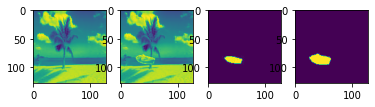

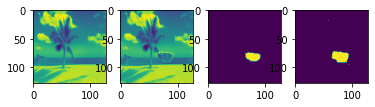

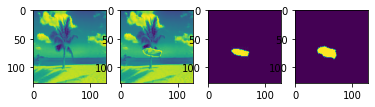

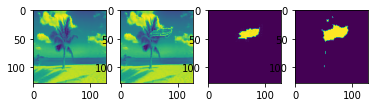

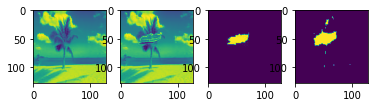

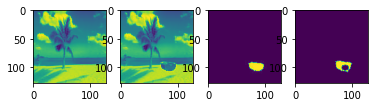

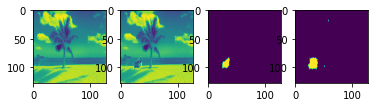

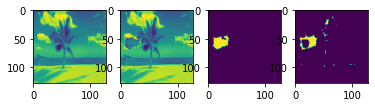

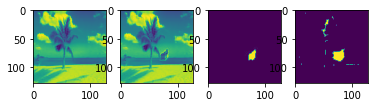

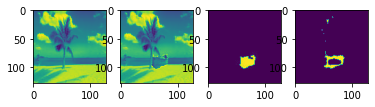

In [10]:
# Get the Background Images & Background with Boat Images list
bImgPath = dataroot+'train_data/resize_background/'
bFImgPath = dataroot+'train_data/train/'
targetMaskPath = dataroot+'train_data/mask/'
estimatedMaskPath = dataroot+'train_data/est_mask/'
bImgFiles = os.listdir(bImgPath)
bFImgFiles = os.listdir(bFImgPath)
targetMaskFiles = os.listdir(targetMaskPath)

# print(len(bImgFiles))

for bImg in bImgFiles:
  # Get all BF Images corresponding to it
  x = bImg.split('.')[0]
  bfImgs = [str for str in bFImgFiles if x in str]
  # print(bfImgs)
  for bfImg in bfImgs:
    # Pass to function - createMask()
    estMask, fig = createMask(bImgPath+bImg, bFImgPath+bfImg,targetMaskPath+bfImg)
    #print('.......got result')
    # fig = plt.figure()
    plt.subplot(1,4,4)
    plt.imshow(estMask)
    fig.show()

    # Save the Estimated Foreground Image Mask 
    cv2.imwrite(os.path.join(estimatedMaskPath , bfImg), estMask)
    
  
  print('.......completed saving '+ x + ' Background')
